In [36]:
#import labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [37]:
start="2014-01-01"
end="2024-12-12"
stock="GOOG"
data=yf.download(stock,start,end)

C:\Users\asus\AppData\Local\Temp\ipykernel_31264\3900123236.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [38]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.560261,27.674898,27.439930,27.618199,73129082
2014-01-03,27.359213,27.654593,27.357480,27.606808,66917888
2014-01-06,27.664249,27.702378,27.394866,27.557536,71037271
2014-01-07,28.197569,28.218120,27.759328,27.854403,102486711
2014-01-08,28.256248,28.407034,28.059657,28.374351,90036218
...,...,...,...,...,...
2024-12-05,173.705536,177.093755,173.406573,176.705108,16145500
2024-12-06,175.877991,176.225780,172.948183,173.277041,13319500


In [39]:
data.reset_index(inplace=True)

In [40]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.560261,27.674898,27.439930,27.618199,73129082
1,2014-01-03,27.359213,27.654593,27.357480,27.606808,66917888
2,2014-01-06,27.664249,27.702378,27.394866,27.557536,71037271
3,2014-01-07,28.197569,28.218120,27.759328,27.854403,102486711
4,2014-01-08,28.256248,28.407034,28.059657,28.374351,90036218
...,...,...,...,...,...,...
2750,2024-12-05,173.705536,177.093755,173.406573,176.705108,16145500
2751,2024-12-06,175.877991,176.225780,172.948183,173.277041,13319500
2752,2024-12-09,176.686096,177.623886,174.990057,175.304323,19887800


In [41]:
move_100_days=data.Close.rolling(100).mean()

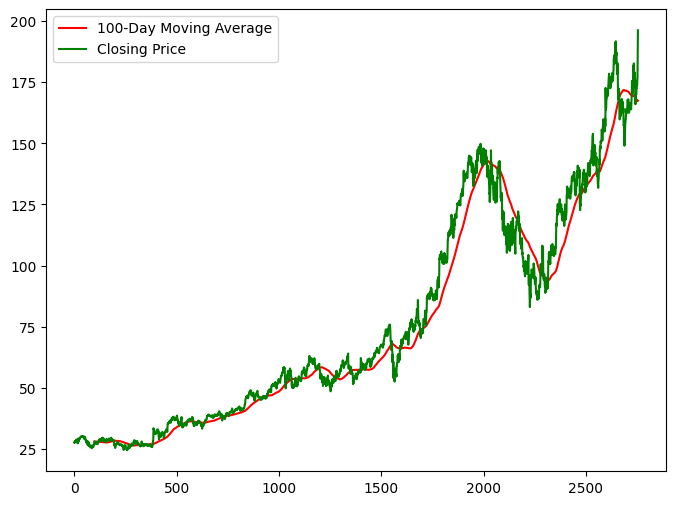

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(move_100_days, "r", label="100-Day Moving Average")
plt.plot(data['Close'], "g", label="Closing Price")
plt.legend()
plt.show()


In [43]:
move_200_days=data.Close.rolling(200).mean()

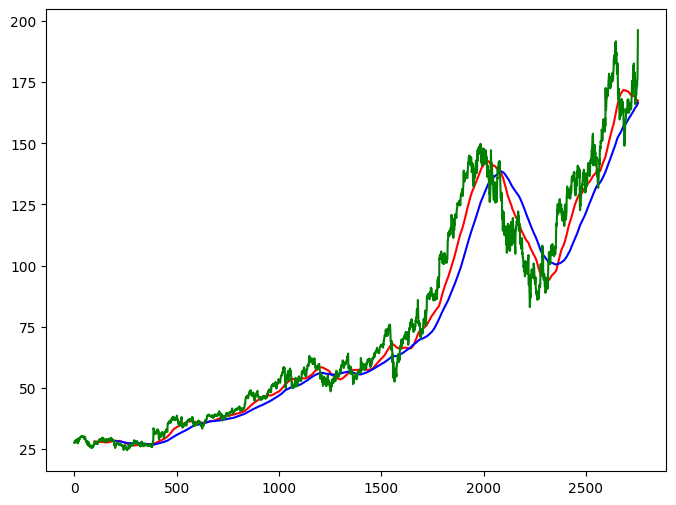

In [44]:
plt.figure(figsize=(8,6))
plt.plot(move_100_days,'r')
plt.plot(move_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [45]:
data.dropna(inplace=True)

In [46]:
#train the data
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [47]:
data_train.shape[0]


2204

In [48]:
data_test.shape[0]

551

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [50]:
data_train_scale=scaler.fit_transform(data_train)

In [51]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [52]:
x,y=np.array(x),np.array(y)

In [53]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [54]:
model=Sequential()
model.add(LSTM(units=50, activation="relu",return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
from re import VERBOSE
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - loss: 0.0570
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0074
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0069
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0055
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0047
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - loss: 0.0043
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - loss: 0.0041
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0038
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0040
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0037
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0037
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0048
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0045
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0037
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 15

In [56]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [57]:
past_100_days=data_train.tail(100)

In [58]:
data_test=pd.concat([past_100_days,data_test],ignore_index=True)

In [59]:
data_test_scale=scaler.fit_transform(data_test)

In [60]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [61]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step


In [62]:
#convert prediction values(0-1)to actual values
scale=1/scaler.scale_

In [63]:
y_predict=y_predict*scale

In [64]:
y=y*scale

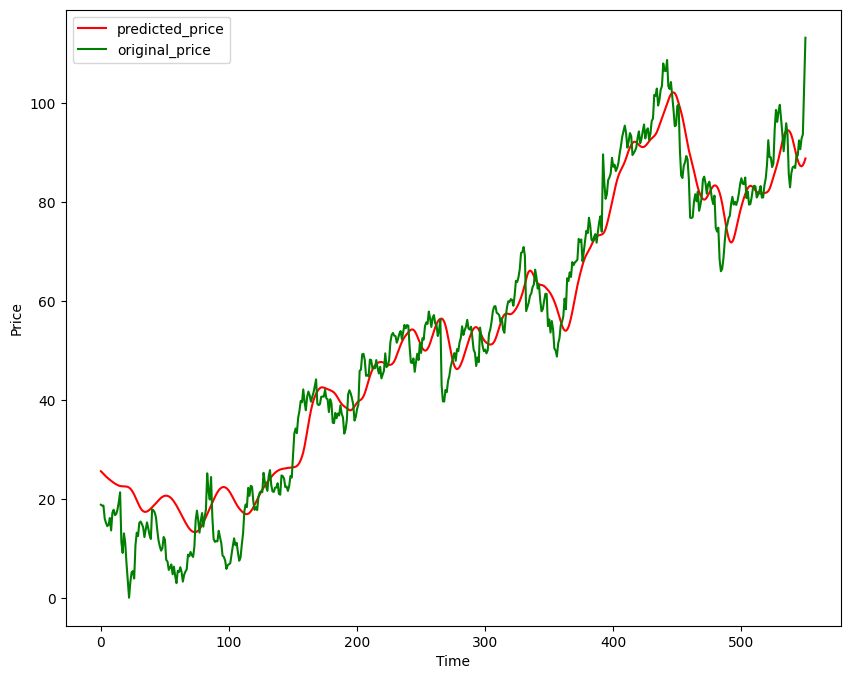

In [65]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label="predicted_price")
plt.plot(y,'g',label="original_price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [67]:
model.save('stock_price_prediction.keras')